# Cómo cargar bases de datos JSON


In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

Analicemos brevemente el archivo data.json

```json
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg","label":"b"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/30_B.jpg","label":"b"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/95_B.jpg","label":"b"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/58_A.jpg","label":"a"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/50_A.jpg","label":"a"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/46_A.jpg","label":"a"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/3_C.jpg","label":"c"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/32_C.jpg","label":"c"}
{"content": "https://storage.googleapis.com/platzi-tf2/img_mnist/2_C.jpg","label":"c"}
```


Básicamente, es una secuencia de diccionarios, que tiene como llaves: `content` para mostrar el URL de la imagen y `label` el cual contiene la clasificación de dicha imagen. Observamos que como tal NO es el formato más correcto de json, puesto que para que puediera ser cargado por `json.load` el archivo debería indicar que es una lista con `[]` y cada elemento debería ir separado por `,` entonces debemos leer este archivo de una forma ligeramente diferente.


## Ejemplo en código:

El flujo más simple de trabajo para este ejemplo es:

1. Leer el archivo data.json
2. Para cada url de content:

- hacer un request para recibir la imagen
- transformar el response en un numpy array

3. Mostrar un ejemplo de la imagen y el label recibido


## 1: Importamos bibliotecas necesarias


In [3]:
from io import BytesIO
from json import loads

import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image

## 2: Leemos el archivo data.json

Lo podemos leer como un texto plano, y por cada línea dentro del archivo decodificar dicha linea como json ocupando su método `loads`


In [ ]:
url = "../data/databasesLoadData/sign_mnist_json/data.json"

In [ ]:
with open(url, "r", encoding="utf-8") as file:
    data = [loads(line) for line in file.readlines()]

In [ ]:
print(f"{len(data)} Imagenes cargadas")

## 3: Acceder a cada elemento dentro de `data`

Como ahora cada línea es un archivo json, puedo acceder al valor de sus llaves utilizando get


In [ ]:
X, y = [], []

for example in data:
    print(example)
    url_image = example.get("content", 0)
    label = example.get("label", 0)

## 4: Descargando cada imagen y convirtiéndola a un numpy array


In [ ]:
# Peticion al servidor

response = requests.get(url_image).content
print(type(response), response)

# Transformando 'bytes' en PIL Image
pil_image = Image.open(BytesIO(response))

print(pil_image)

# Transformando PIL Image en un array de numpy
img = np.asarray(pil_image).reshape(28, 28)

X.append(img)

y.append(label)

Aquí adicionalmente, añadimos a las listas `X`, `y` los valores decodificados de las imágenes y labels pertinentes.


## 5: Mostrando un ejemplo de imagen clasificada


In [ ]:
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.xticks([])
plt.yticks([])
plt.show()

# Cargar bases de datos CSV y BASE 64


## Ejemplo de Base 64

Base64 es una forma de codificar datos binarios en caracteres ASCII para que puedan ser transmitidos a través de canales que no admiten datos binarios, como el correo electrónico o la web. En Base64, cada conjunto de tres bytes (24 bits) se convierte en una cadena de cuatro caracteres ASCII.

Base64 se utiliza para enviar archivos adjuntos de correo electrónico, imágenes y otros tipos de datos a través de Internet. Por ejemplo, si tienes una imagen en formato binario, puedes convertirla en Base64 y luego enviarla en un correo electrónico como una cadena de texto. Cuando el destinatario recibe el correo electrónico, puede decodificar la cadena Base64 y obtener la imagen original.

Base64 es útil en situaciones donde los datos binarios no pueden ser transmitidos directamente. Sin embargo, es importante tener en cuenta que la codificación Base64 aumenta el tamaño de los datos en aproximadamente un tercio. Además, Base64 no proporciona ningún tipo de encriptación o seguridad, por lo que no se debe utilizar como una forma de proteger datos sensibles.


Por experiencia laboral Base64 también es un formato muy útil para enviar imágenes a ser procesadas por un API, tiene sentido que esta codificación b64 sea utilizada en un endpoint para analizar dicha imagen.

Ahora que ya entendemos un poco más acerca de Base 64, veamos un ejemplo de nuestra base de datos data.json:

```JSON
{
"b": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z"
}
```


Nuestro dataset, vuelve a ser un archivo en formato `json`, sin embargo, este es diferente al anterior, ahora en lugar de tener como valores de las llaves la dirección de la imagen y su `label`, ahora tenemos algo más `simplificado`, tenemos únicamente como llave la label de la imagen y como valor la propia imagen pero en formato `b64`.


## 1: Importando bibliotecas necesarias

Vamos a utilizar OpenCv para acceder a un método muy útil imdecode que me permitirá junto con numpy convertir un texto en formato b64 a un numpy array


In [4]:
import base64
from json import load

import cv2 as cv

## 2: Creamos función auxiliar de conversión b64 a numpy.array


In [ ]:
def b64_to_np(b_string: str):
    jpg_original = base64.b64decode(b_string)
    jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
    image_buffer = cv.imdecode(jpg_as_np, flags=1)
    return image_buffer

## 3: Leemos el archivo data.json b64


In [ ]:
with open(
    "../data/databasesLoadData/sign_mnist_base64/data.json", "r", encoding="utf-8"
) as file:
    data = load(file)

    X, y = [], []

## 4: Convertimos cada b64 en un numpy array


In [ ]:
for example in data:

    for label, b_image in data.items():
        print(label, "-", b_image)
        img = b64_to_np(b_image)
        X.append(img)
        y.append(label)

## 5: graficamos para observar el resultado


In [ ]:
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.xticks([])
plt.yticks([])
plt.show()

# Ejemplo de CSV

Primero familiaricémonos con nuestros datos sign_mnist_test.csv


## 1: Conozcamos los datos


In [5]:
import pandas as pd

In [ ]:
data = pd.read_csv("../data/databasesLoadData/sign_mnist_train/sign_mnist_train.csv")
sample = len(data)
print(f"Numero de ejemplos: {sample}")
print(data)

Podemos observar que la primera columna contiene un `label encoding` de las clases. Mientras que las siguientes columnas son el `flatten` de la imagen (28x28) píxeles.


## 2. Separamos el dataset en `X` & `y`


In [ ]:
y = data["label"].values
X = data.drop("label", axis=1).values.reshape((sample, 28, 28))

En realidad es todo, pandas almacena los datos como numpy arrays, solo necesitamos acceder a ellos y hacerles un `reshape` indicándole que tenemos `n` imágenes correspondientes al valor de `samples` y que cada imagen es de _(28x28)_


## 3. Graficamos


In [ ]:
plt.imshow(X[4], cmap="gray")
plt.title(f"Label: {label}")
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocesamiento y limpieza de datos


Vamos a hacer un análisis de datos y limpieza del mismo:


## 1: Importando bibliotecas


In [32]:
import seaborn as sns

## 2: Leyendo nuestro dataset


In [41]:
train = pd.read_csv(
    "../data/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv"
)

print(train)

       label pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8 pixel9  \
0          3    107    118    127    134    139    143    146    150    153   
1          6    155    157    156    156    156    157    156    158    158   
2          2    187    188    188    187    187    186    187    188    187   
3          2    211    211    212    212    211    210    211    210    210   
4         13    164    167    170    172    176    179    180    184    185   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
27450     13    189    189    190    190    192    193    193    193    193   
27451     23    151    154    157    158    160    161    163    164    166   
27452     18    174    174    174    174    174    175    175    174    173   
27453     17    177    181    184    185    187    189    190    191    191   
27454     23    179    180    180    180    182    181    182    183    182   

       ... pixel775 pixel776 pixel777 pixel778 pixe

C:\Users\mike\AppData\Local\Temp\ipykernel_6808\1308986316.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

¿Cuántas clases tiene nuestro dataset?


In [43]:
len(train)

27455

In [59]:
y = train[["label"]]
X = train.drop("label", axis=1)

In [60]:
n_clases = sorted(y["label"].unique())
print(len(n_clases), n_clases)

24 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [61]:
y

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


In [62]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


¿Cuál es la distribución de datos de nuestro dataset por clase?


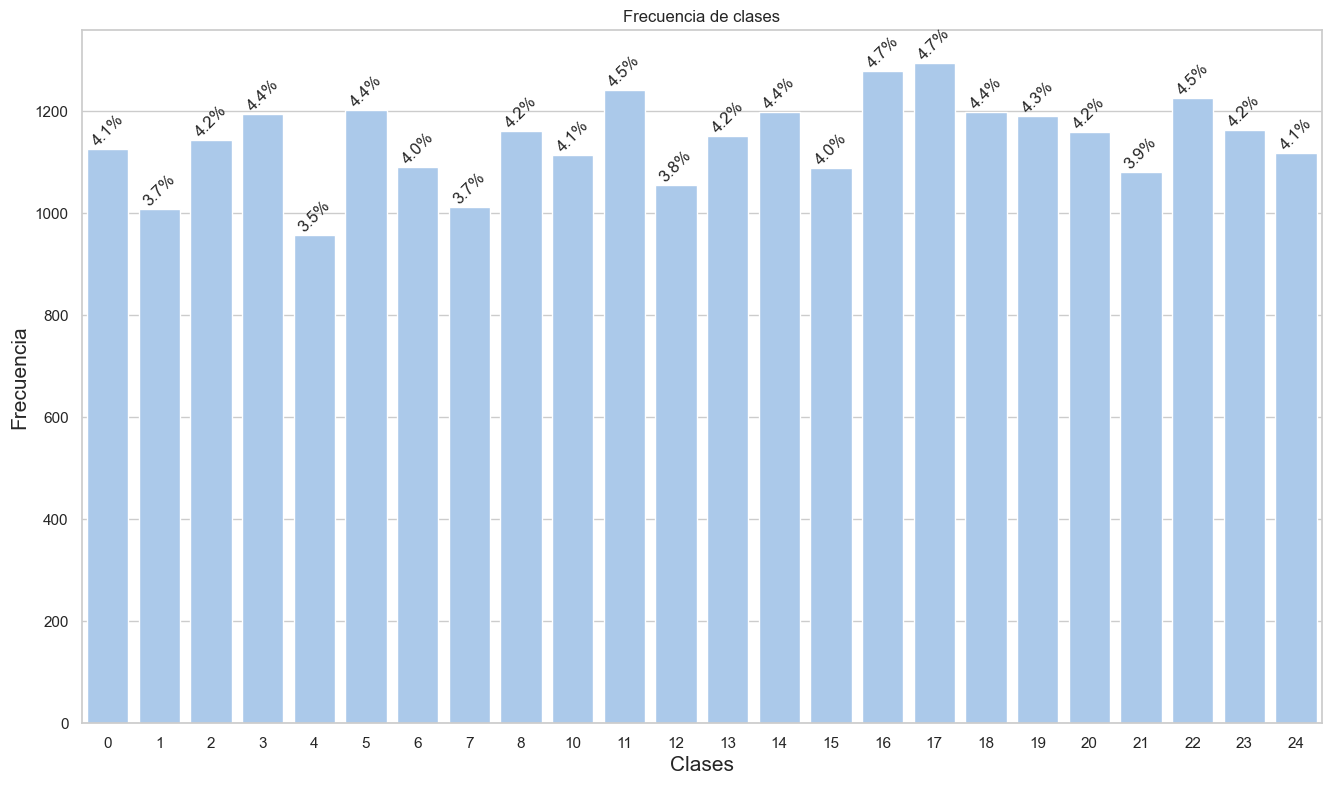

In [91]:
sns.set_theme(style="whitegrid", context="notebook", palette="pastel")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

sns.countplot(y, x="label", ax=ax)

ax.bar_label(
    ax.containers[0],
    rotation=45,
    label_type="edge",
    fmt=lambda x: "{:.1f}%".format(x / len(train) * 100),
)


plt.xlabel("Clases", size=15)
plt.ylabel("Frecuencia", size=15)
plt.title("Frecuencia de clases")
plt.show()

En general podemos observar que nuestro dataset NO cuenta con un desequilibrio de claes notorio.


¿Qué tipo de dato tienen nuestras features?


In [65]:
print(X.dtypes)

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object


Esto indica la presencia de datos de texto en nuestras columnas, lo cuál NO es bueno porque se supone que solamente estamos guardando variables numéricas.


¿Tenemos datos faltantes?


In [66]:
print(X.isnull().values.any())

False


No, no tenemos missing values.


¿Existen datos duplicados?


In [72]:
print(X[X.duplicated()])

Empty DataFrame
Columns: [label, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, ...]
Index: []

[0 rows x 785 columns]


Sí, sí tenemos.


## 3: Limpiando el dataset


In [71]:
X = train.drop([317, 487, 595, 689, 802, 861], axis=0)

In [73]:
X[X["pixel1"] == "fwefew"]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,19,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [74]:
X = X.drop([727], axis=0)

In [75]:
X = X.astype(str).astype(int)

X /= 255

print(X.head())
print(X.dtypes)

      label    pixel1    pixel2    pixel3    pixel4    pixel5    pixel6  \
0  0.011765  0.419608  0.462745  0.498039  0.525490  0.545098  0.560784   
1  0.023529  0.607843  0.615686  0.611765  0.611765  0.611765  0.615686   
2  0.007843  0.733333  0.737255  0.737255  0.733333  0.733333  0.729412   
3  0.007843  0.827451  0.827451  0.831373  0.831373  0.827451  0.823529   
4  0.050980  0.643137  0.654902  0.666667  0.674510  0.690196  0.701961   

     pixel7    pixel8    pixel9  ...  pixel775  pixel776  pixel777  pixel778  \
0  0.572549  0.588235  0.600000  ...  0.811765  0.811765  0.811765  0.811765   
1  0.611765  0.619608  0.619608  ...  0.270588  0.584314  0.501961  0.341176   
2  0.733333  0.737255  0.733333  ...  0.792157  0.788235  0.784314  0.780392   
3  0.827451  0.823529  0.823529  ...  0.921569  0.917647  0.913725  0.905882   
4  0.705882  0.721569  0.725490  ...  0.360784  0.411765  0.411765  0.423529   

   pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
0  0

Perfecto, nuestros datos ya están normalizados y ahora todos son datos numéricos.
